In [2]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [3]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [4]:
NUM_CLASSES = 10

# Dataset reading

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,180 (4.61 KB)

 Trainable params: 1,180 (4.61 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 92/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1159 - loss: 2.3460
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1181 - loss: 2.3419 - val_accuracy: 0.2460 - val_loss: 2.2029
Epoch 2/1000
 95/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1975 - loss: 2.2116
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1983 - loss: 2.2105 - val_accuracy: 0.3376 - val_loss: 2.0772
Epoch 3/1000
 93/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2484 - loss: 2.1124
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2494 - loss: 2.1106 - val_accuracy: 0.4000 - val_loss: 1.9094
Epoch 4/1000
 97/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2875 - loss: 2.0032
Epoch 4: saving model to model/keypoint_classifier/keypoint_class

In [13]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8807 - loss: 0.4496


In [14]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [15]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
[2.9986203e-03 3.5856592e-03 6.3625202e-11 2.5056025e-03 1.9412317e-16
 8.4389274e-15 8.4144576e-09 8.2893976e-06 4.6831686e-03 9.8621863e-01]
9


# Confusion matrix

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


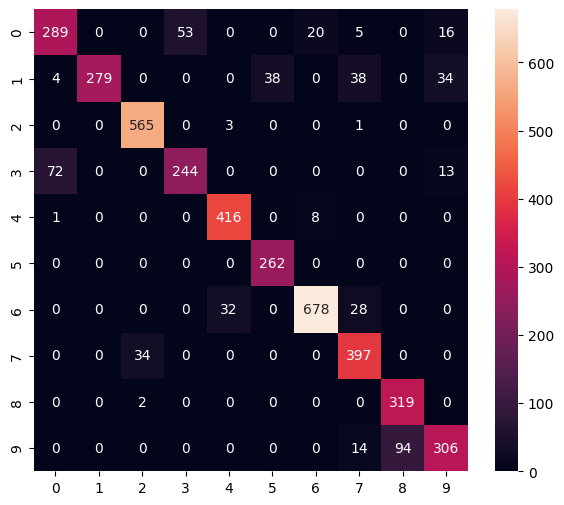

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       383
           1       1.00      0.71      0.83       393
           2       0.94      0.99      0.97       569
           3       0.82      0.74      0.78       329
           4       0.92      0.98      0.95       425
           5       0.87      1.00      0.93       262
           6       0.96      0.92      0.94       738
           7       0.82      0.92      0.87       431
           8       0.77      0.99      0.87       321
           9       0.83      0.74      0.78       414

    accuracy                           0.88      4265
   macro avg       0.87      0.88      0.87      4265
weighted avg       0.89      0.88      0.88      4265



In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [17]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [18]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\82104\AppData\Local\Temp\tmp930q04ex\assets


INFO:tensorflow:Assets written to: C:\Users\82104\AppData\Local\Temp\tmp930q04ex\assets


Saved artifact at 'C:\Users\82104\AppData\Local\Temp\tmp930q04ex'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2896533152592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2896533154176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2896533148544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2896551239120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2896551244752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2896551234720: TensorSpec(shape=(), dtype=tf.resource, name=None)


6820

# Inference test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.9986189e-03 3.5856573e-03 6.3625688e-11 2.5056037e-03 1.9412388e-16
 8.4389579e-15 8.4144247e-09 8.2893903e-06 4.6831816e-03 9.8621863e-01]
9
